In [1]:
%matplotlib inline

In [78]:
rm img/*

In [79]:
"""
Plot learning curve.
"""

import matplotlib.pyplot as plt
import numpy as np
import argparse
from glob import glob

def plot_acc(path_list, legends=None, model_name=None, ylim=None, x_max=None, figsize=(16, 12)):  # train loss, train acc, loss, acc
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 24
    
    if legends is None:
        legend_list = [pp.replace("./log/", "").replace("/statistics.npz", "").replace("/progress-150-acc.npz", "") for pp in path_list]
    else:
        legend_list = legends
    
    fig = plt.figure(0, figsize=figsize)
    plt.subplot(2, 1, 1)
    print("Train Perplexity")
    for i, l in zip(path_list, legend_list):
        acc = np.load(i)
        print("%0.2f : %s" % (acc["loss"][-1, 0], l))
        plt.plot(acc["loss"][:, 0], label=l)
    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.subplots_adjust(right=0.7)
    plt.grid()
    plt.xlim(xmin=0)
    if x_max is not None:
        plt.xlim(xmax=x_max)
    plt.ylabel("Training accuracy")
    
    plt.subplot(2, 1, 2)
    print("Validation Perplexity")
    for i, l in zip(path_list, legend_list):
        acc = np.load(i)
        print("%0.2f : %s" % (acc["loss"][-1, 1], l))
        plt.plot(acc["loss"][:, 1], label=l)
    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.subplots_adjust(right=0.7)
    plt.grid()
    plt.xlim(xmin=0)
    if x_max is not None:
        plt.xlim(xmax=x_max)
    plt.ylabel("Validation accuracy")
    plt.xlabel("Epoch")
    
    print("Test Perplexity")
    for i, l in zip(path_list, legend_list):
        acc = np.load(i)
        print("%0.2f : %s" % (acc["perplexity_test"], l))
    

## Vanilla LSTM

Train Perplexity
26.50 : vanilla LSTM
45.80 : RHN
37.78 : Hypernets
Validation Perplexity
149.39 : vanilla LSTM
127.44 : RHN
129.94 : Hypernets
Test Perplexity
143.31 : vanilla LSTM
121.23 : RHN
122.49 : Hypernets


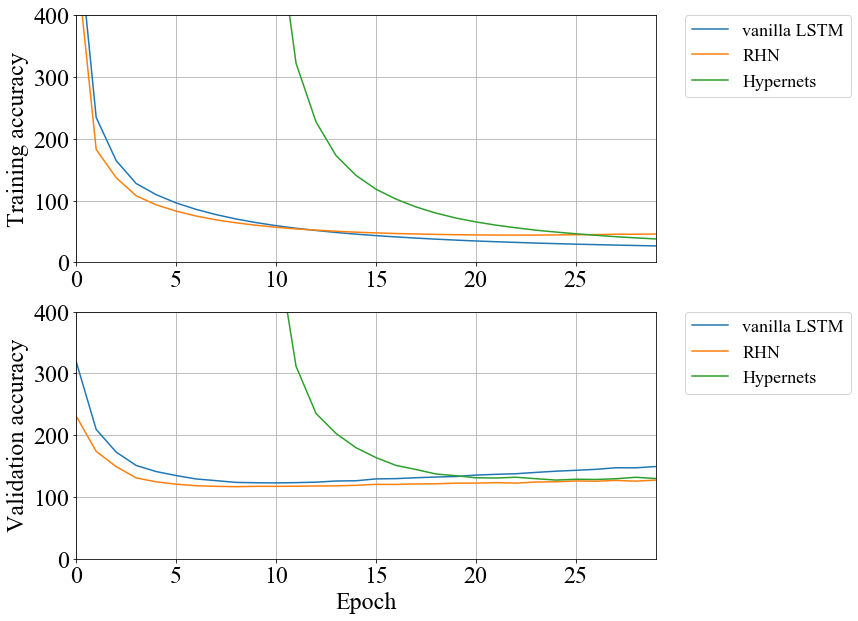

In [80]:
_list = np.array(glob("./log/lstm_*/statistics.npz"))
legends = ["vanilla LSTM", "RHN", "Hypernets"]
plot_acc(_list, legends=legends, model_name=model, figsize=(14, 10), x_max=29, ylim=[0, 400])
plt.savefig("./img/perplexity.png", bbox_inches="tight")
plt.show()